In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/states.csv')

In [ ]:
data.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         51 non-null     object 
 1   metro_res     51 non-null     float64
 2   white         51 non-null     float64
 3   hs_grad       51 non-null     float64
 4   poverty       51 non-null     float64
 5   female_house  51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [ ]:
data.drop('state', axis=1, inplace=True)

In [ ]:
data.head(1)

,metro_res,white,hs_grad,poverty,female_house
0,55.4,71.3,79.9,14.6,14.2


## Построим тепловую карту кореляции для нашего датасета

In [ ]:
corr_matrix = data.corr(numeric_only=True)

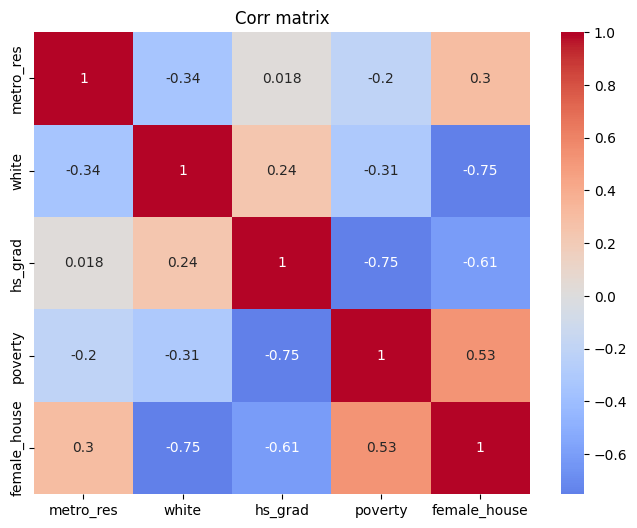

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap="coolwarm",
            center=0)

plt.title("Corr matrix")
plt.show()

## Так как корреляция признаков white и female_house больше 0.7, значит мы удаляем признак white.

In [ ]:
data.drop("white", axis = 1, inplace=True)

In [ ]:
data.head(1)

,metro_res,hs_grad,poverty,female_house
0,55.4,79.9,14.6,14.2


## Создадим новые переменные для столбцов признаков - (B) и для таргета - (Y) и переведем в numpy формат для дальнейшей удобной работы.

In [ ]:
B = data.drop('poverty', axis=1)

In [ ]:
B.head(2)

,metro_res,hs_grad,female_house
0,55.4,79.9,14.2
1,65.6,90.6,10.8


In [ ]:
B = B.to_numpy()

In [ ]:
Y = data['poverty']
Y = Y.to_numpy()

## Построим уравнение линейной множественной регрессии.

H₀ (нулевая гипотеза): Все коэффициенты регрессии (кроме свободного члена) равны нулю. Это означает, что факторы не влияют на зависимую переменную.

H₁ (альтернативная гипотеза): Хотя бы один коэффициент регрессии отличен от нуля.

In [ ]:
y = Y
x1, x2, x3 = B[:, 0], B[:, 1], B[:, 2]
n = len(Y)
sum_x1 = sum(x1)
sum_x2 = sum(x2)
sum_x3 = sum(x3)
sum_y = sum(y)
sum_x1_pow = sum(x1 ** 2)
sum_x2_pow = sum(x2 ** 2)
sum_x3_pow = sum(x3 ** 2)
sum_x1_x2 = sum(x1 * x2)
sum_x1_x3 = sum(x1 * x3)
sum_x2_x3 = sum(x2 * x3)
sum_y_x1 = sum(y * x1)
sum_y_x2 = sum(y *x2)
sum_y_x3 = sum(y * x3)

A = np.array([
    [n, sum_x1, sum_x2, sum_x3],
    [sum_x1, sum_x1_pow, sum_x1_x2, sum_x1_x3],
    [sum_x2, sum_x1_x2, sum_x2_pow, sum_x2_x3],
    [sum_x3, sum_x1_x3, sum_x2_x3, sum_x3_pow]])

B = np.array([sum_y, sum_y_x1, sum_y_x2, sum_y_x3])

In [ ]:
X = np.linalg.inv(A) @ B

In [ ]:
X

array([ 5.40596067e+01, -5.39626388e-02, -4.94228684e-01,  3.17848875e-01])

In [ ]:
B = (data.drop("poverty", axis = 1))
B = B.to_numpy()

## Определим значение коэффициента множественной корреляции R и коэффициента детерминации R2

In [ ]:
y_pred = X[0] + B[:, 0] * X[1] + B[:, 1] * X[2] + B[:, 2] * X[3]
y_mean = np.mean(Y)

In [ ]:
SSE = np.sum((Y - y_pred)**2)
SST = np.sum((Y - y_mean)**2)
R2 = 1 - (SSE / SST)
R = np.sqrt(R2)

In [ ]:
R2

np.float64(0.6250554112179456)

In [ ]:
R

np.float64(0.7906044593966983)

In [ ]:
n = B.shape[0]
m = B.shape[1]

In [ ]:
F = (R2 / (1 - R2)) * ((n - m - 1) / m)

In [ ]:
F

np.float64(26.11728524355358)

In [ ]:
import scipy.stats as stats
n = len(Y)
m = B.shape[1]

sigma_hat = np.sqrt(SSE / (n - m - 1))
cov_matrix = np.linalg.inv(A) * sigma_hat**2
std_errors = np.sqrt(np.diag(cov_matrix))

t_values = X / std_errors

p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - m - 1)) for t in t_values]

for i, (coef, t, p) in enumerate(zip(X, t_values, p_values)):
    print(f"Коэффициент b_{i}: {coef:.4f}, t = {t:.3f}, p-value = {p:.4f}")
    if p < 0.05:
        print("Значим (p < 0.05)")
    else:
        print("Незначим (p > 0.05)")

Коэффициент b_0: 54.0596, t = 5.768, p-value = 0.0000
  → Значим (p < 0.05)
Коэффициент b_1: -0.0540, t = -2.737, p-value = 0.0087
  → Значим (p < 0.05)
Коэффициент b_2: -0.4942, t = -5.070, p-value = 0.0000
  → Значим (p < 0.05)
Коэффициент b_3: 0.3178, t = 1.967, p-value = 0.0551
  → Незначим (p > 0.05)


## Таким образом мы получили статистически значимые коэффициенты 1, 2, 3 а коэффициент 4 не является значимым для целевой переменной.

In [ ]:
B_new = B[['metro_res', 'hs_grad']].to_numpy()

x1, x2 = B_new[:, 0], B_new[:, 1]
n = len(Y)
sum_x1 = sum(x1)
sum_x2 = sum(x2)
sum_y = sum(y)
sum_x1_pow = sum(x1 ** 2)
sum_x2_pow = sum(x2 ** 2)
sum_x1_x2 = sum(x1 * x2)
sum_y_x1 = sum(y * x1)
sum_y_x2 = sum(y * x2)

A_new = np.array([
    [n, sum_x1, sum_x2],
    [sum_x1, sum_x1_pow, sum_x1_x2],
    [sum_x2, sum_x1_x2, sum_x2_pow]
])

B_vector = np.array([sum_y, sum_y_x1, sum_y_x2])
X_new = np.linalg.solve(A_new, B_vector)

print(f"Новое уравнение: ŷ = {X_new[0]:.3f} + {X_new[1]:.3f}·metro_res + {X_new[2]:.3f}·hs_grad")

Новое уравнение: ŷ = 67.330 + -0.039·metro_res + -0.618·hs_grad


In [ ]:
y_pred = X_new[0] + X_new[1]*B_new[:, 0] + X_new[2]*B_new[:, 1]
residuals = Y - y_pred

In [ ]:
SST = np.sum((Y - np.mean(Y))**2)
SSE = np.sum(residuals**2)
R2 = 1 - (SSE / SST)
print(f"R2 = {R2:.4f}")

R² = 0.5942


In [ ]:
R = np.sqrt(R2)
print(f"R = {R:.4f}")

R = 0.7708


In [ ]:
sigma_hat = np.sqrt(SSE / (n - m - 1))
cov_matrix = np.linalg.inv(A_new) * sigma_hat**2
std_errors = np.sqrt(np.diag(cov_matrix))
t_values = X_new / std_errors
p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - m - 1)) for t in t_values]

for i, (coef, t, p) in enumerate(zip(X_new, t_values, p_values)):
    print(f"Коэффициент b_{i}: {coef:.4f}, t = {t:.3f}, p-value = {p:.4f}")

Коэффициент b_0: 67.3301, t = 10.052, p-value = 0.0000
Коэффициент b_1: -0.0387, t = -2.074, p-value = 0.0434
Коэффициент b_2: -0.6183, t = -8.084, p-value = 0.0000


In [ ]:
print(f"Старый R²: 0.625, Новый R²: {R2:.3f}")

Старый R²: 0.625, Новый R²: 0.594


### После исключения незначимого предиктора female_house (p = 0.055), модель сохранила объяснительную способность (R² = 0.594 против 0.625). Упрощение оправдано, так как все коэффициенты теперь статистически значимы (p < 0.05), а потеря точности минимальна.

In [ ]:
n = len(Y)
m = B_new.shape[1]
F = (R2 / (1 - R2)) * ((n - m - 1) / m)
print(f"F = {F:.4f}")

from scipy.stats import f
F_crit = f.ppf(1 - 0.05, m, n - m - 1)
print(f"F-критическое (α=0.05) = {F_crit:.4f}")

if F > F_crit:
    print("Модель значима (p < 0.05)")
else:
    print("Модель незначима")

F = 35.1394
F-критическое (α=0.05) = 3.1907
Модель значима (p < 0.05)


In [ ]:
import numpy as np
import statsmodels.api as sm

sorted_idx = np.argsort(B_new[:, 1])
B_sorted = B_new[sorted_idx]
Y_sorted = Y[sorted_idx]

In [ ]:
B_group1 = B_sorted[:17]
Y_group1 = Y_sorted[:17]

B_group2 = B_sorted[-17:]
Y_group2 = Y_sorted[-17:]

In [ ]:
def get_residuals(X, Y):
    model = sm.OLS(Y, sm.add_constant(X)).fit()
    return model.resid

resid1 = get_residuals(B_group1, Y_group1)
resid2 = get_residuals(B_group2, Y_group2)

model_resid1 = sm.OLS(resid1, sm.add_constant(B_group1)).fit()
model_resid2 = sm.OLS(resid2, sm.add_constant(B_group2)).fit()

S1 = model_resid1.ssr
S2 = model_resid2.ssr

In [ ]:
R = max(S1, S2) / min(S1, S2)
print(f"R = {R:.4f}")

R = 1.2361


In [ ]:
alpha = 0.05
df = 14
F_crit = f.ppf(1 - alpha, df, df)

print(f"Критическое значение F({df},{df}) на уровне {alpha}: {F_crit:.4f}")

if R > F_crit:
    print(f"R = {R:.4f} > F_crit = {F_crit:.4f} Гетероскедастичность есть!")
else:
    print(f"R = {R:.4f} ≤ F_crit = {F_crit:.4f} Гомоскедастичность!")

NameError: name 'f' is not defined

## Часть 2
### 1)	Создадим новые признаки



In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(B, columns=['metro_res', 'hs_grad', 'female_house'])

df['metro_res_hs_grad'] = df['metro_res'] * df['hs_grad']
df['metro_res_female_house'] = df['metro_res'] * df['female_house']
df['hs_grad_female_house'] = df['hs_grad'] * df['female_house']

In [ ]:
df.head(2)

,metro_res,hs_grad,female_house,metro_res_hs_grad,metro_res_female_house,hs_grad_female_house
0,55.4,79.9,14.2,4426.46,786.68,1134.58
1,65.6,90.6,10.8,5943.36,708.48,978.48


## Построим матрицу кореляции

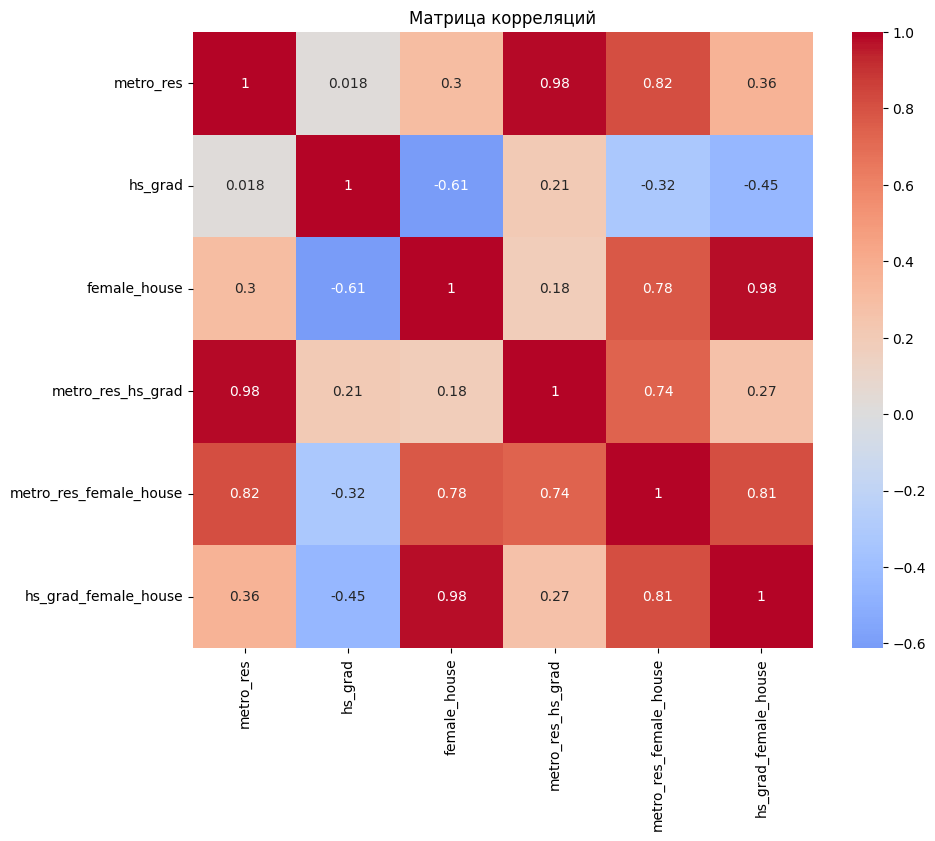

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

### Теперь построим модель, используя все отобранные признаки
### Проверим статистическую значимость модели
### Вычислим коэффициент детерминации

In [ ]:
from scipy import stats

X = df.to_numpy()
Y = data['poverty'].to_numpy()
n = len(Y)

X_full = np.column_stack([np.ones(n), X])

A = X_full.T @ X_full
B_vec = X_full.T @ Y
beta = np.linalg.inv(A) @ B_vec

y_pred = X_full @ beta
y_mean = np.mean(Y)
SSE = np.sum((Y - y_pred)**2)
SST = np.sum((Y - y_mean)**2)
R2 = 1 - (SSE / SST)
F = (R2 / (1 - R2)) * ((n - 6 - 1) / 6)

sigma_hat = np.sqrt(SSE / (n - 6 - 1))
cov_matrix = np.linalg.inv(A) * sigma_hat**2
std_errors = np.sqrt(np.diag(cov_matrix))
t_values = beta / std_errors
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=n-6-1))

print("Уравнение регрессии с взаимодействиями:")
print(f"ŷ = {beta[0]:.4f} + {beta[1]:.4f}·metro_res + {beta[2]:.4f}·hs_grad + {beta[3]:.4f}·female_house")
print(f"+ {beta[4]:.4f}·metro_res×hs_grad + {beta[5]:.4f}·metro_res×female_house + {beta[6]:.4f}·hs_grad×female_house")

print(f"\nR2 = {R2:.4f}")
print(f"F-статистика = {F:.4f}")

print("\nПроверка значимости коэффициентов:")
for i, col in enumerate(['intercept'] + df.columns.tolist()):
    print(f"{col}: beta = {beta[i]:.4f}, t = {t_values[i]:.4f}, p-value = {p_values[i]:.4f}",
          "(значим)" if p_values[i] < 0.05 else "(незначим)")

Уравнение регрессии с взаимодействиями:
ŷ = 48.7214 + -1.1951·metro_res + -0.2313·hs_grad + 6.8111·female_house
+ 0.0108·metro_res×hs_grad + 0.0210·metro_res×female_house + -0.0955·hs_grad×female_house

R2 = 0.6817
F-статистика = 15.7076

Проверка значимости коэффициентов:
intercept: beta = 48.7214, t = 1.0509, p-value = 0.2990 (незначим)
metro_res: beta = -1.1951, t = -1.9651, p-value = 0.0557 (незначим)
hs_grad: beta = -0.2313, t = -0.4453, p-value = 0.6583 (незначим)
female_house: beta = 6.8111, t = 1.9088, p-value = 0.0628 (незначим)
metro_res_hs_grad: beta = 0.0108, t = 1.6497, p-value = 0.1061 (незначим)
metro_res_female_house: beta = 0.0210, t = 2.5758, p-value = 0.0134 (значим)
hs_grad_female_house: beta = -0.0955, t = -2.1345, p-value = 0.0384 (значим)


##Прирост R² за счёт взаимодействий: 0,0877
##Прирост R² значителен — модель c взаимодействием предпочтительнее.